In [12]:
# Import libraries 
import librosa
import pandas
import librosa.display
import numpy as np
from librosa import load, power_to_db
from librosa.display import specshow
from PIL import Image
from librosa.feature import melspectrogram
import matplotlib
import matplotlib.pyplot as plt
import tensorflow as tf
from matplotlib.pyplot import specgram
import pandas as pd
import glob 
from sklearn.metrics import confusion_matrix
import IPython.display as ipd  # To play sound in the notebook
import os
import sys
import warnings
# ignore warnings 
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning) 

In [15]:
SAVEE = "Audio/"

In [16]:
dir_list = os.listdir(SAVEE)
dir_list[0:5]

['DCa01.wav', 'DCa02.wav', 'DCa03.wav', 'DCa04.wav', 'DCa05.wav']

In [40]:
dir_list = os.listdir(SAVEE)

# parse the filename to get the emotions
emotion=[]
path = []
name = []
Audclass = []
for i in dir_list:
    if i[-8:-6]=='sa':
        emotion.append('male_sad')
        Audclass.append('sa')
    elif i[-7:-6]=='d':
        Audclass.append('d')
        emotion.append('male_disgust')
    elif i[-7:-6]=='f':
        Audclass.append('f')
        emotion.append('male_fear')
    elif i[-7:-6]=='h':
        Audclass.append('h')
        emotion.append('male_happy')
    elif i[-7:-6]=='n':
        Audclass.append('n')
        emotion.append('male_neutral')
    elif i[-7:-6]=='a':
        Audclass.append('a')
        emotion.append('male_angry')
    elif i[-8:-6]=='su':
        Audclass.append('su')
        emotion.append('male_surprise')
    else:
        emotion.append('male_error') 
    path.append(SAVEE + i)
    name.append(i[:-4])
    
# Now check out the label count distribution 
SAVEE_df = pd.DataFrame(emotion, columns = ['labels'])
SAVEE_df['source'] = 'SAVEE'
SAVEE_df = pd.concat([SAVEE_df, pd.DataFrame(path, columns = ['path'])], axis = 1)
SAVEE_df = pd.concat([SAVEE_df, pd.DataFrame(name, columns = ['name'])], axis = 1)
SAVEE_df = pd.concat([SAVEE_df, pd.DataFrame(Audclass, columns = ['class'])], axis = 1)
SAVEE_df.labels.value_counts()

male_neutral     120
male_fear         60
male_angry        60
male_sad          60
male_happy        60
male_surprise     60
male_disgust      60
Name: labels, dtype: int64

In [41]:
SAVEE_df

,labels,source,path,name,class
0,male_angry,SAVEE,Audio/DCa01.wav,DCa01,a
1,male_angry,SAVEE,Audio/DCa02.wav,DCa02,a
2,male_angry,SAVEE,Audio/DCa03.wav,DCa03,a
3,male_angry,SAVEE,Audio/DCa04.wav,DCa04,a
4,male_angry,SAVEE,Audio/DCa05.wav,DCa05,a
...,...,...,...,...,...
475,male_surprise,SAVEE,Audio/KLsu11.wav,KLsu11,su
476,male_surprise,SAVEE,Audio/KLsu12.wav,KLsu12,su
477,male_surprise,SAVEE,Audio/KLsu13.wav,KLsu13,su
478,male_surprise,SAVEE,Audio/KLsu14.wav,KLsu14,su


In [42]:
path = "Audio/JKsu04.wav"
X, sample_rate = librosa.load(path, res_type='kaiser_fast',sr=22050*2)  
X = librosa.util.fix_length(X, 200000)
mfcc = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=20)

# # audio wave
# plt.figure(figsize=(20, 15))
# plt.subplot(3,1,1)
# librosa.display.waveplot(X, sr=sample_rate)
# plt.title('Audio sampled at 44100 hrz')

# # MFCC
# plt.figure(figsize=(20, 15))
# plt.subplot(3,1,1)
# librosa.display.specshow(mfcc, x_axis='time')
# plt.ylabel('MFCC')
# plt.colorbar()

# ipd.Audio(path)
S = melspectrogram(X,sr=sample_rate,n_mels=128,n_fft=1024,hop_length=512)
print(S.shape)

(128, 391)


Text(0.5, 1.0, 'Audio sampled at 44100 hrz')

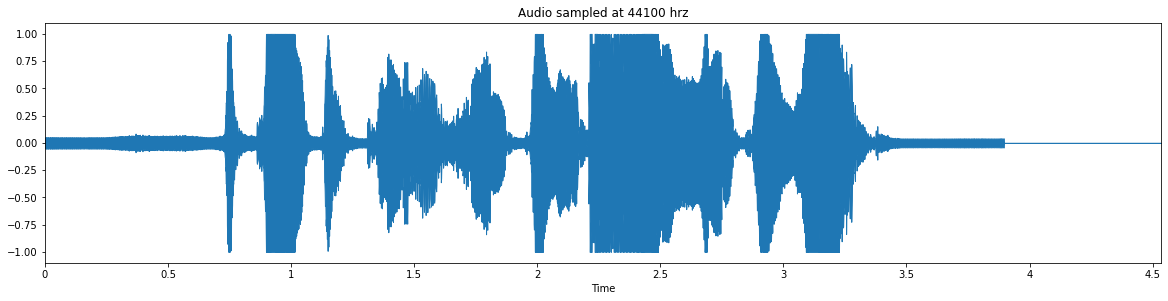

In [43]:
# audio wave
plt.figure(figsize=(20, 15))
plt.subplot(3,1,1)
librosa.display.waveplot(X, sr=sample_rate)
plt.title('Audio sampled at 44100 hrz')

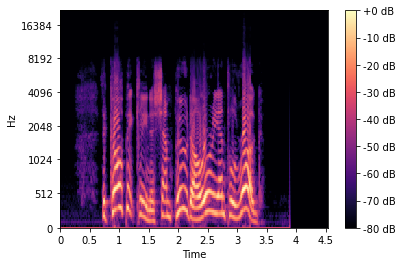

In [44]:
sgram = librosa.stft(X)

sgram_mag, _ = librosa.magphase(sgram)
mel_scale_sgram = librosa.feature.melspectrogram(S=sgram_mag, sr=sample_rate)

# use the decibel scale to get the final Mel Spectrogram
mel_sgram = librosa.amplitude_to_db(mel_scale_sgram, ref=np.max)
librosa.display.specshow(mel_sgram, sr=sample_rate, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')

In [45]:
print(type(mel_sgram), mel_sgram.shape)

<class 'numpy.ndarray'> (128, 391)


In [83]:
matplotlib.image.imsave('mels.png', mel_sgram)
im = Image.open(r"mels.png")

In [46]:
IMAGE = 'ImageData/'

In [48]:
for entities in SAVEE_df.itertuples():
    X, sample_rate = librosa.load(entities[3], res_type='kaiser_fast',sr=22050*2)  
    X = librosa.util.fix_length(X, 200000)
    sgram = librosa.stft(X)

    sgram_mag, _ = librosa.magphase(sgram)
    mel_scale_sgram = librosa.feature.melspectrogram(S=sgram_mag, sr=sample_rate)

    # use the decibel scale to get the final Mel Spectrogram
    mel_sgram = librosa.amplitude_to_db(mel_scale_sgram, ref=np.max)
    matplotlib.image.imsave(IMAGE + entities[5] + '/' + entities[4] + '.jpg', mel_sgram)
    melPath.append(IMAGE + entities[5] + '/' + entities[4] + '.jpg')

In [49]:
SAVEE_df = pd.concat([SAVEE_df, pd.DataFrame(melPath, columns = ['mel_path'])], axis = 1)

In [50]:
SAVEE_df

,labels,source,path,name,class,mel_path
0,male_angry,SAVEE,Audio/DCa01.wav,DCa01,a,ImageData/a/DCa01.jpg
1,male_angry,SAVEE,Audio/DCa02.wav,DCa02,a,ImageData/a/DCa02.jpg
2,male_angry,SAVEE,Audio/DCa03.wav,DCa03,a,ImageData/a/DCa03.jpg
3,male_angry,SAVEE,Audio/DCa04.wav,DCa04,a,ImageData/a/DCa04.jpg
4,male_angry,SAVEE,Audio/DCa05.wav,DCa05,a,ImageData/a/DCa05.jpg
...,...,...,...,...,...,...
475,male_surprise,SAVEE,Audio/KLsu11.wav,KLsu11,su,ImageData/su/KLsu11.jpg
476,male_surprise,SAVEE,Audio/KLsu12.wav,KLsu12,su,ImageData/su/KLsu12.jpg
477,male_surprise,SAVEE,Audio/KLsu13.wav,KLsu13,su,ImageData/su/KLsu13.jpg
478,male_surprise,SAVEE,Audio/KLsu14.wav,KLsu14,su,ImageData/su/KLsu14.jpg


In [51]:
SAVEE_df.to_csv('data.csv')